In [1]:
using CairoMakie, Random, DelimitedFiles

In [2]:
function permutation(seed)
    Random.seed!(seed)
    p = collect(1:256)
    q = []
    while length(p) > 0
        i = rand(1:length(p))
        push!(q,p[i])
        deleteat!(p,i)
    end
    return q
end
@assert sort(unique(permutation(rand(1:21587))))==collect(1:256)

In [3]:
P = permutation(1);
Q = permutation(2);
V = permutation(3);

In [4]:
function gradient(v)
    h = v % 4
    if (h==0)
        return [1.,1.]
    elseif (h==1)
        return [-1.,1.]
    elseif (h==2)
        return [-1.,-1.]
    else
        return [1.,-1.]
    end
end

smooth(x) = ((6.0*x-15.0)*x+10.0)*x*x*x
lerp(x,a1,a2) = a1+x*(a2-a1)

lerp (generic function with 1 method)

In [5]:
function noise(x,y,P)
    X = floor(x) % 256 +1 |>Int
    Y = floor(y) % 256 +1 |>Int

    X < 0 ? X += 256 : nothing
    Y < 0 ? Y += 256 : nothing

    xf = x-floor(x)
    yf = y-floor(y)

    tr = [xf-1.,yf-1.]
    tl = [xf,yf-1.]
    br = [xf-1.,yf]
    bl = [xf,yf]

    vtr = P[(P[(X+1)%256+1]+(Y+1)%256+1)%256+1]
    vtl = P[(P[X%256+1]+(Y+1)%256+1)%256+1]
    vbr = P[(P[(X+1)%256+1]+Y%256+1)%256+1]
    vbl = P[(P[X%256+1]+Y%256+1)%256+1]

    dtr = tr.*gradient(vtr)|>sum
    dtl = tl.*gradient(vtl)|>sum
  
    dbr = br.*gradient(vbr)|>sum
    dbl = bl.*gradient(vbl)|>sum


    u = smooth(xf)
    v = smooth(yf)

   return lerp(
        u,
        lerp(v,dbl,dtl),
        lerp(v,dbr,dtr)
    )*0.5 + 0.5
end

function turbulence(x,y,size,P)
    t = 0.0
    scale = size
    while scale > 1.0
        t += abs(scale*noise(x/scale,y/scale,P))
        scale /= 2.0
    end
    return t
end

turbulence (generic function with 1 method)

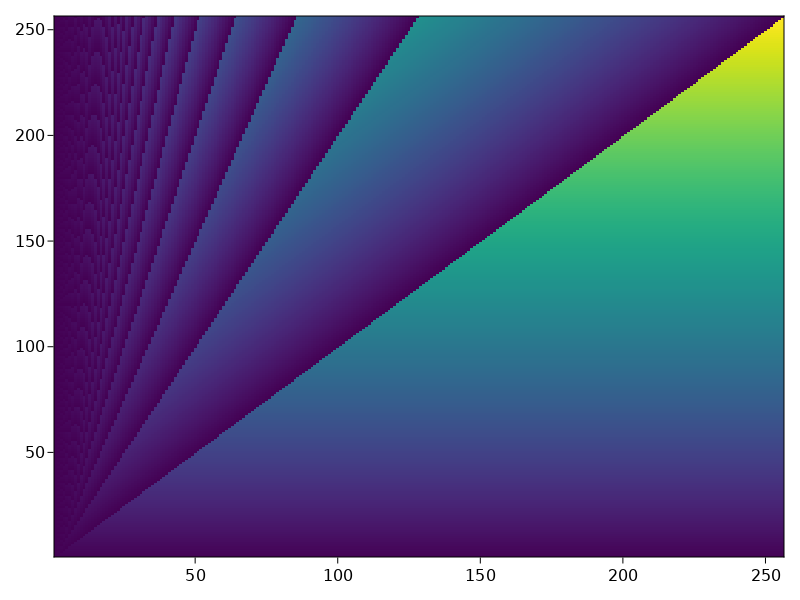

In [6]:
n=256
A = zeros(n,n)
for i in 1:n
    for j in 1:n
        A[i,j] = j%i
    end
end
heatmap(A)

In [103]:
w=512
x = 0:w-1|>collect
y = copy(x);
A = Bool.(zeros(length(x),length(y)))
B = Bool.(zeros(length(x),length(y)))
C = Bool.(zeros(length(x),length(y)))
xP = 5.0
yP = 5.0
turb = 0.07
r = 256

for i in 1:length(x)
    for j in 1:length(y)
        u = x[i]*xP / w
        v = y[j]*yP / w
        t = u+v+turb*turbulence(x[i],y[j],w,P)

        u = x[i]*xP / w
        v = y[j]*yP / w
        s = u+v+10.0*turb*turbulence(x[i],y[j],w,Q)

        u = x[i]*xP*10. / w
        v = y[j]*yP*10. / w
        r = u+v+2.0*turb*turbulence(x[i],y[j],w,V)

        A[i,j] = (sin(t).>0.2)
        B[i,j] = sin(s).>0.5
        C[i,j] = cos(r).>0.3
    end
end

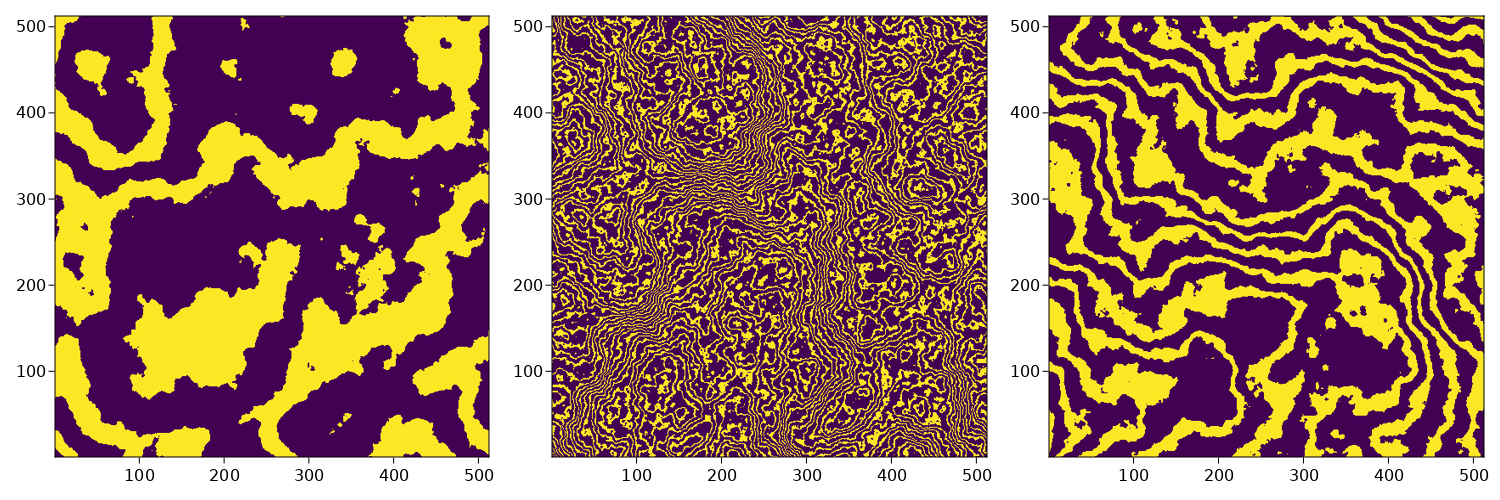

In [104]:
fig = Figure(resolution=(1500,500))
ax = Axis(fig[1,1])
heatmap!(ax,A)
ax = Axis(fig[1,2])
heatmap!(ax,B)
ax = Axis(fig[1,3])
heatmap!(ax,C)
fig

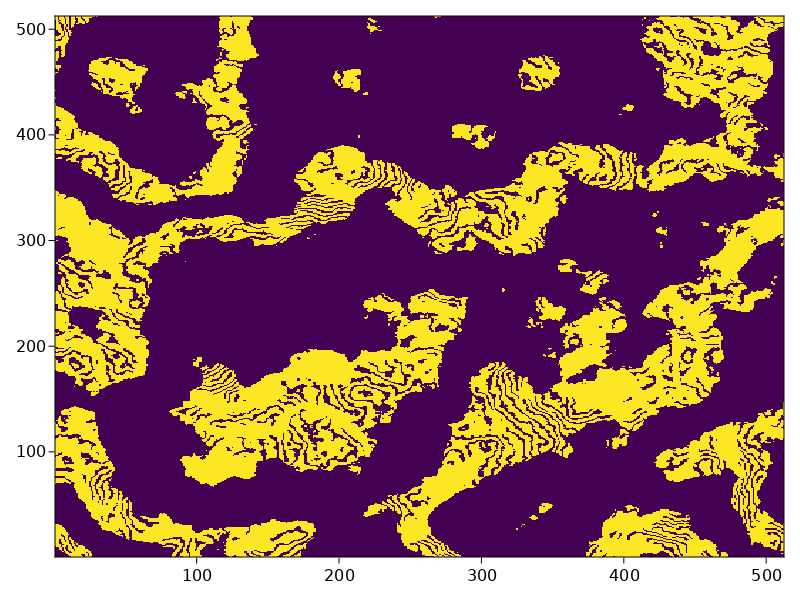

In [105]:
fig = Figure()
ax = Axis(fig[1,1])
C = A .& (.~(B .& .~C))
heatmap!(ax,C)
fig

In [548]:
C = zeros(1:128-1,1:128-1);
@timed for i in 1:size(C,1)
    for j in 1:size(C,2)
        a = M[i,j+1]
        b = M[i+1,j+1]
        c = M[i+1,j]
        d = M[i,j]
        C[i,j] = a | (b<<1) | (c<<2) | (d<<3)
    end
end

(value = nothing, time = 0.004280861, bytes = 524288, gctime = 0.0, gcstats = Base.GC_Diff(524288, 0, 0, 16384, 0, 0, 0, 0, 0))

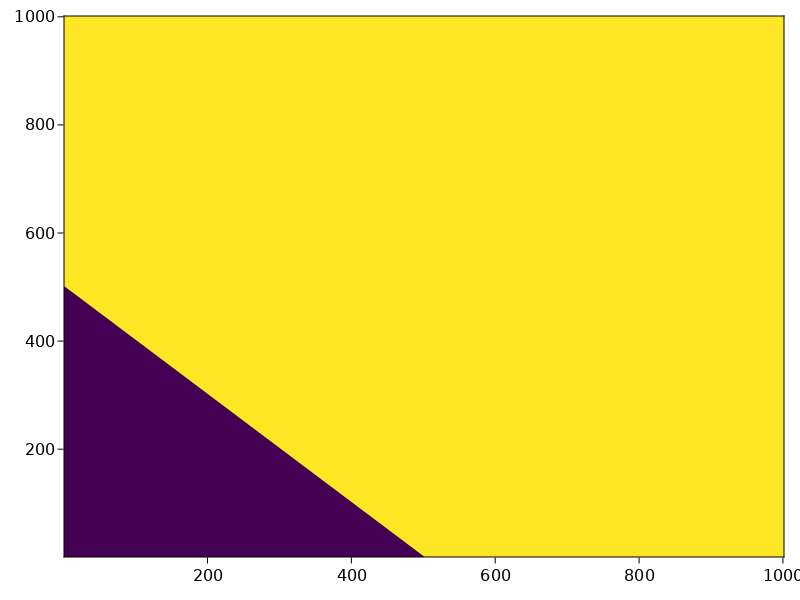

In [593]:
#(x[i])+(y[j])>0.5
x = 0.0:0.001:1.0
y = copy(x)
A = zeros(length(x),length(y))
for i in 1:length(x)
    for j in 1:length(y)
        if ((x[i])+(y[j])>0.5)
            A[i,j]=1.0
        end
    end
end
heatmap(A

In [155]:
a=[1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

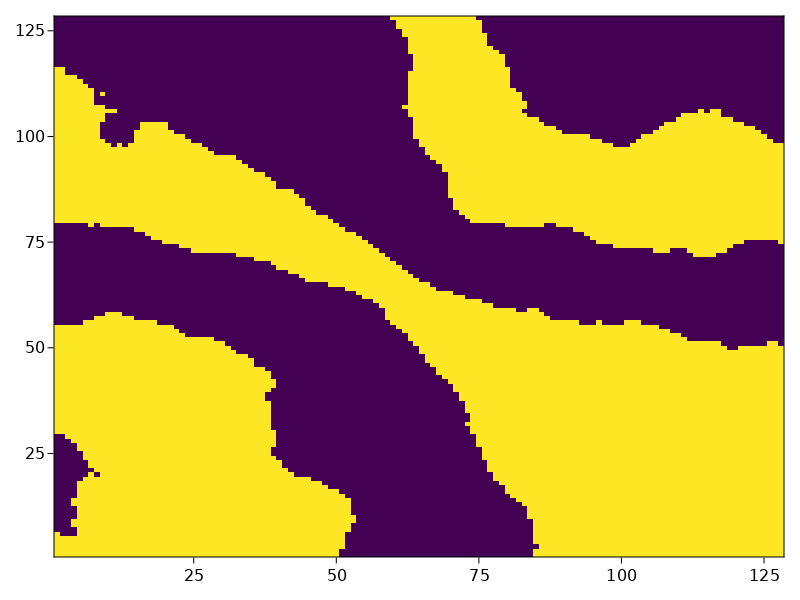

In [239]:
n=parse(Int,readlines("t.map")[1])
M = Float64.(readdlm("t.map",',')[2:end,:]);
M=reshape(M,(n,n,4));
heatmap(M[:,:,4])


In [240]:
M = M[:,:,4]
M = reshape(Bool.(m),length(m));

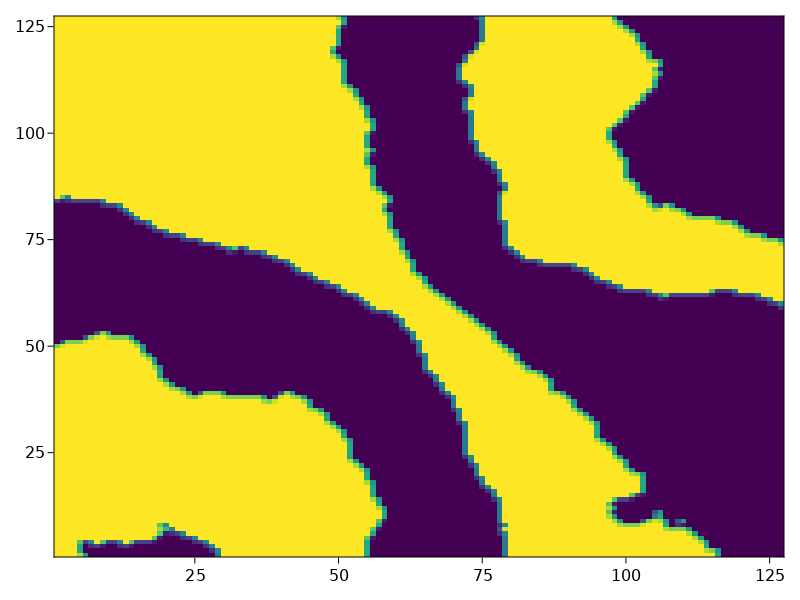

In [244]:
C = zeros(128-1,128-1)
r = 128
for i in 0:size(C,1)-1
    for j in 0:size(C,2)-1
        a = M[i*r+j+1+1]
        b = M[(i+1)*r+j+1+1]
        c = M[(i+1)*r+j+1]
        d = M[i*r+j+1]
        C[i+1,j+1] = a | (b<<1) | (c<<2) | (d<<3)
    end
end
heatmap(C)

In [119]:
A = zeros(9,9)
k=0
i = 1
j = 1
ll = i*9+j+1
lr = (i+1)*9+j+1
ur = (i+1)*9+j
ul = i*9+j
A[ll+1]=1
A[lr+1]=2
A[ur+1]=3
A[ul+1]=4
A

9×9 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  4.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [114]:
n=3
m=9
A = zeros(m,m);

o = (n*n)*3+n
for i in 0:n-1
    for j in 0:n-1
        idx = o+i*(m)+j
        A[idx+1]=1
    end
end
reshape(A,(m,m))

9×9 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

turbulence (generic function with 1 method)

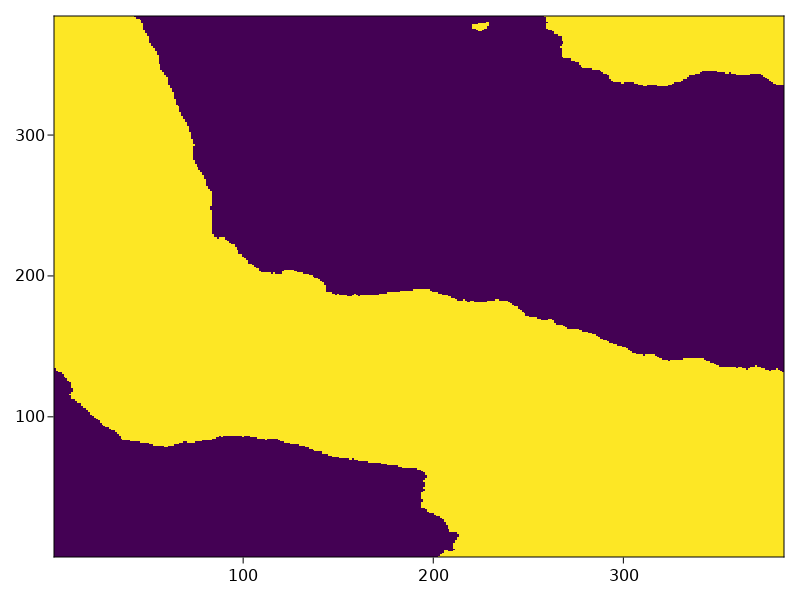

In [218]:
fig = Figure()
ax = Axis(fig[1,1])
heatmap!(ax,A.>0.2)
fig

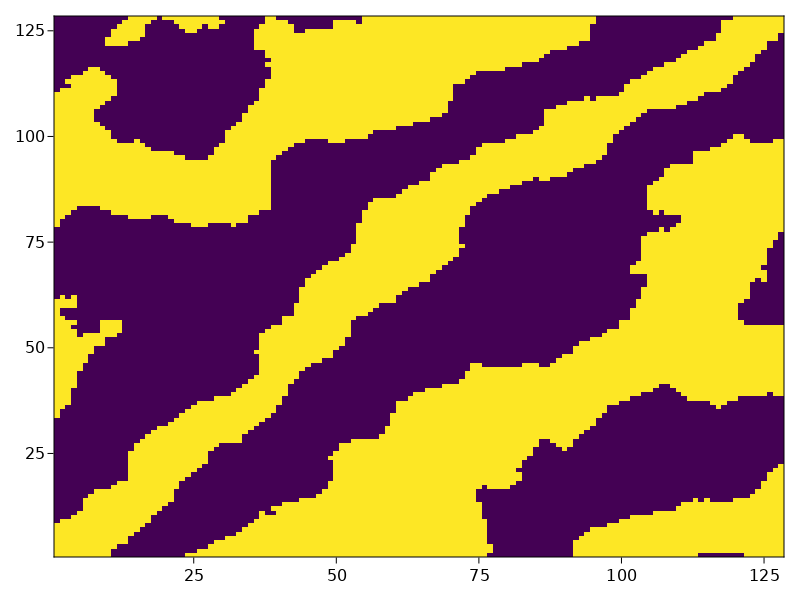

In [150]:
n = 128
m = 3*n
o = n*n*3+n
A = reshape(A,(size(A,1),size(A,2)))
B = zeros(n*n)

for i in 0:n-1
    for j in 0:n-1
        idxB = i*n+j
        idxA = o+i*m+j
        B[idxB+1] = A[idxA+1]
    end
end
B=reshape(B,(n,n))
heatmap(B.>0.2)

In [436]:
x = 0:1000|>collect
y = copy(x);
A = zeros(length(x),length(y))

freq = 0.01
@timed for k in 0:3
    for i in 1:length(x)
        for j in 1:length(y)
            A[i,j] += (1.0/2^k)*noise(cos(noise(x[i]*freq,y[j]*freq,P)),sin(noise(x[j]*freq,y[i]*freq,P)),P)
        end
    end
    freq *= 2
end
A = (A.-minimum(A)) ./ (maximum(A)-minimum(A));

LoadError: [91mInterruptException:[39m

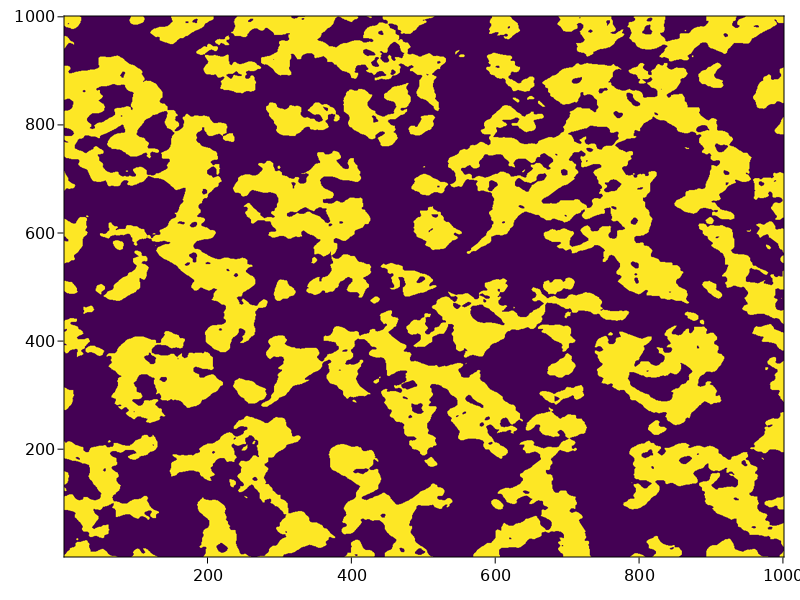

In [351]:
fig = Figure()
ax = Axis(fig[1,1])
heatmap!(ax,A.>0.85)
fig